# **Baseline GB Model**

**Business problem:** Train a binary classification model to accurately predict if an NBA rookie player will have a career that will last at least 5 years in the league.

## **Pre-processing**

### Load Packages

In [1]:
# File management
import os

# Data/numeric manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Modelling
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


### Load Data

In [2]:
# Create data directory
if not os.path.exists('/content/kaggle'):
    os.makedirs('/content/kaggle')
    
# Create output directory
if not os.path.exists('/content/output'):
    os.makedirs('/content/output')

# Download data from Kaggle API, unzip and place in data directory
os.environ['KAGGLE_USERNAME'] = "kallikrates"
os.environ['KAGGLE_KEY'] = "6ec6a025503be3d3b75961c4c2ac2748"
!kaggle datasets download -d kallikrates/nba-career-prediction-data
!unzip -q nba-career-prediction-data.zip -d /content/kaggle

#Create data objects
train_data = pd.read_csv('/content/kaggle/train.csv')
test_data = pd.read_csv('/content/kaggle/test.csv')

PermissionError: [Errno 13] Permission denied: '/content'

### Check Data

#### Summarise Data

In [3]:
train_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,7798.50000,62.777875,18.576663,7.267087,2.807037,6.231213,44.608900,0.264525,0.816563,19.583700,1.392525,1.947787,71.365825,1.077838,2.168500,3.245300,1.624513,0.648688,0.245212,1.257762,0.833625
std,3977.447579,2309.54541,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,3799.00000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,5798.75000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,7798.50000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,9798.25000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,11798.00000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [4]:
test_data.describe()

,Id_old,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,1899.000000,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,1096.821164,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,0.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,949.500000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,1899.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,2848.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,3798.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


#### Check for Missing Values

In [5]:
# Check for NULL values in train data
train_data.isnull().sum()

Id_old         0
Id             0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [6]:
# Check for NULL values in test data
test_data.isnull().sum()

Id_old     0
Id         0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

#### Target Variable Balance Check

Check distribution of target variable. It appears unbalanced, but within the context (NBA players still in the league), reasonable. I will not treat it as an issue at this point.

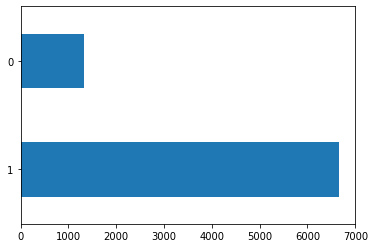

In [7]:
# Check distribution balance of target variable
train_data.TARGET_5Yrs.value_counts().plot(kind='barh')
plt.show()

## **Define Train and Test Data**

### Drop unused variables

Here variables that will not be used to train are dropped from the subset. The target variable is also dropped. Standardisation is being applied as this is a common requirement for many scikit-learn machine learning estimators. If individual features are not standard normally distributed data, the model may produce suboptimal outputs. Here the standardisation is scaling features to lie between a given minimum and maximum value.

In [25]:
train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')

test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

scaler = MinMaxScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)

X_data, X_test, y_data, y_test = train_test_split(df_train_scaled, train_data_target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(train_data.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(8000, 22)
(5120, 19)
(1280, 19)
(1600, 19)


##**Modelling**

###Regular Gradient Boost

In [13]:
state = 12
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=state)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.075
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.1
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.25
Accuracy score (training): 0.834
Accuracy score (validation): 0.840
Learning rate:  0.5
Accuracy score (training): 0.836
Accuracy score (validation): 0.843
Learning rate:  0.75
Accuracy score (training): 0.839
Accuracy score (validation): 0.836
Learning rate:  1
Accuracy score (training): 0.840
Accuracy score (validation): 0.838


In [14]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=state)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[   0  203]
 [   0 1077]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.84      1.00      0.91      1077

    accuracy                           0.84      1280
   macro avg       0.42      0.50      0.46      1280
weighted avg       0.71      0.84      0.77      1280



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**ROC AUC**

In [15]:
roc_auc_score(y_val, gb_clf2.predict_proba(X_val)[:,1])

0.7006165639822348

###XGBoost

In [16]:
lr_list_x = [0.01,0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list_x:
    xgb_clf = XGBClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=state)
    xgb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(xgb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(xgb_clf.score(X_val, y_val)))

Learning rate:  0.01
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.05
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.075
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.1
Accuracy score (training): 0.831
Accuracy score (validation): 0.841
Learning rate:  0.25
Accuracy score (training): 0.834
Accuracy score (validation): 0.839
Learning rate:  0.5
Accuracy score (training): 0.837
Accuracy score (validation): 0.842
Learning rate:  0.75
Accuracy score (training): 0.838
Accuracy score (validation): 0.841
Learning rate:  1
Accuracy score (training): 0.843
Accuracy score (validation): 0.846


In [17]:
xgb_clf = XGBClassifier(learning_rate=0.9,
                        n_estimators=300,
                        max_depth=4,
                        colsample_bynode=1,
                        gamma=8,
                        max_delta_step=1,
                        min_child_weight=1, 
                        missing=None, 
                        n_jobs=1,
                        nthread=None, 
                        objective='binary:logistic', 
                        random_state=state,
                        reg_alpha=0, 
                        reg_lambda=0, 
                        scale_pos_weight=1, 
                        seed=None,
                        silent=None, subsample=1, verbosity=1)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=8,
              learning_rate=0.9, max_delta_step=1, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=12,
              reg_alpha=0, reg_lambda=0, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**ROC AUC**

In [24]:
roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:,1])

0.7223609643646144

###Export Probabilities

In [23]:
submission = xgb_clf.predict_proba(test_data_x)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("/content/output/AdaBoostClassifier_Predictions.csv", index=False)

## **Conclusion**

Initial result. Next model to include hyperparameter tuning. Will try to improve AUC in exp2.